<a href="https://colab.research.google.com/github/nidam2305/nidam/blob/main/MULTICAPA/ejem_flor_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris() ## cargamos las librerias y la variable llamada iris


In [2]:
print(iris.keys()) ## comno podemos acceder a los datos


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris.DESCR) ## descripcion especifica de la funciopn iris osea todas sus caracteristicas


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
iris.target_names ## muestra las entradas X las salidas Y las columnas
iris.target
iris.data
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df
## vamos a trabajar con tablas en donde vendran los nombres de las columnas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df.describe() ## tabla de distribucion de los datos que sea mas facel de leer


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X = iris_df
y = pd.get_dummies(iris.target).values
## nosdira que va a aprender el codigo y con quien se tiene que igualar el modelo es decir va a dividir entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)
## especifica cual porcentaje es de prueba y cual de entrenamiento


In [ ]:
print(X_train.shape)
print(X_test.shape)
## aqui nos muestra como si fuera la matriz es decir los datos que van para train y para test


(120, 4)
(30, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
##


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])
## se construye la red capa por capa con una clasificacion simple es decir el nuemro de neuronas  y le permite al modelo aprender


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## contiene la funcion de perdida mientras predice es decir que va a minimizar el error al momento de clasificarlos

In [ ]:
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)
)
## muestra que eopopcas va arecorrer para observar si el modelo aprendio o no


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7459 - loss: 0.8801 - val_accuracy: 0.9000 - val_loss: 0.4146
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8227 - loss: 0.4059 - val_accuracy: 0.9000 - val_loss: 0.2669
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8418 - loss: 0.3124 - val_accuracy: 0.9333 - val_loss: 0.1896
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9689 - loss: 0.2248 - val_accuracy: 0.9333 - val_loss: 0.1475
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.2103 - val_accuracy: 1.0000 - val_loss: 0.1081
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.1658 - val_accuracy: 1.0000 - val_loss: 0.0862
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9562 - loss: 0.1266 - val_accuracy: 1.0000 - val_loss: 0.0771
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9202 - loss: 0.1370 - val_accuracy: 1.

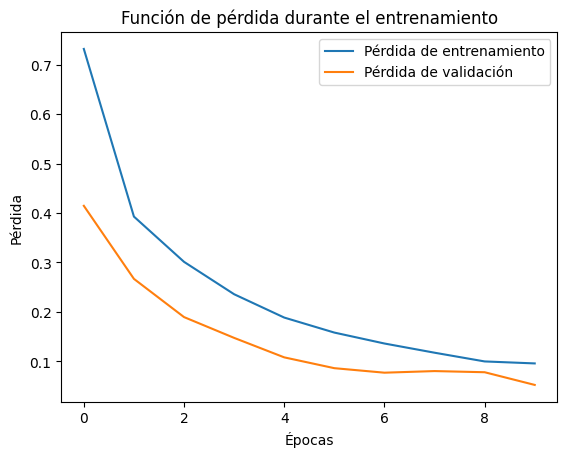

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
## en una grifica nos dice mas visualmente si nuestro  modelo pudo aprender

In [ ]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
## nos dice si memorizo o si si hizo la funcion esperada


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 1.0000 - loss: 0.0524
Loss: 0.05236460268497467, Accuracy: 1.0


In [ ]:
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())
## podemos inspeccionar el rendimiento del problema


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)
## aqui nos muestra nuestra matriz de confusion osea que si procesa los datos


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


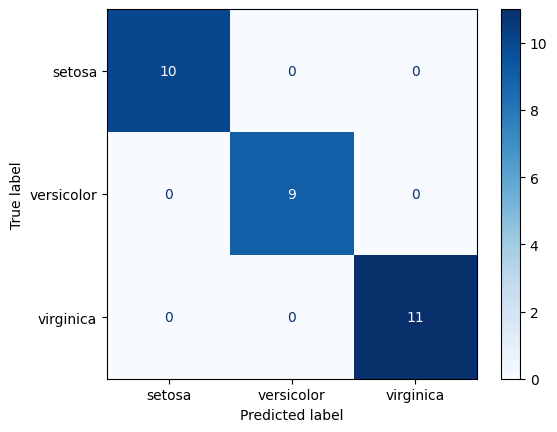

In [ ]:
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')
## aqui la matriz nos muestra exactamente en donde se equivoco el modelo